In [ ]:
pip install torch torchvision torchaudio transformers evaluate

In [ ]:
pip show accelerate nltk seqeval datasets

In [ ]:
pip install chardet

# Exploratory Data Analysis

In [ ]:
from pathlib import Path
import hashlib
import pandas as pd
import os
import chardet
from collections import Counter
import matplotlib.pyplot as plt

In [ ]:
base_dir = Path("/Users/devikarajasekar/Documents/Leiden/Courses/TM/Final assignment/CADEC-lPWNPfjE-")
metadata_dir = base_dir / "metadata"
data_dir = base_dir / "data" / "cadec"
folders_to_explore = ["meddra", "original", "sct", "text"]

# Helper function to calculate checksum
def calculate_checksum(file_path, algorithm="sha256"):
    """Calculate the checksum for a given file."""
    hash_function = hashlib.new(algorithm)
    with open(file_path, "rb") as f:
        while chunk := f.read(8192):
            hash_function.update(chunk)
    return hash_function.hexdigest()


file_summary = []

for folder in folders_to_explore:
    folder_path = data_dir / folder
    if folder_path.exists():
        print(f"Contents of folder: {folder}")
        for file in sorted(folder_path.rglob("*")):
            if file.is_file():
                file_summary.append({"Folder": folder, "File": file.name, "Path": str(file)})
                print(f"  - {file.name}")
    else:
        print(f"Folder {folder} not found!")


file_summary_df = pd.DataFrame(file_summary)
print("\nSummary of dataset files:")
display(file_summary_df)


Exploring dataset structure...

Contents of folder: meddra
  - ARTHROTEC.1.ann
  - ARTHROTEC.10.ann
  - ARTHROTEC.100.ann
  - ARTHROTEC.101.ann
  - ARTHROTEC.102.ann
  - ARTHROTEC.103.ann
  - ARTHROTEC.104.ann
  - ARTHROTEC.105.ann
  - ARTHROTEC.106.ann
  - ARTHROTEC.107.ann
  - ARTHROTEC.108.ann
  - ARTHROTEC.109.ann
  - ARTHROTEC.11.ann
  - ARTHROTEC.110.ann
  - ARTHROTEC.111.ann
  - ARTHROTEC.112.ann
  - ARTHROTEC.113.ann
  - ARTHROTEC.114.ann
  - ARTHROTEC.115.ann
  - ARTHROTEC.116.ann
  - ARTHROTEC.117.ann
  - ARTHROTEC.118.ann
  - ARTHROTEC.119.ann
  - ARTHROTEC.12.ann
  - ARTHROTEC.120.ann
  - ARTHROTEC.121.ann
  - ARTHROTEC.122.ann
  - ARTHROTEC.123.ann
  - ARTHROTEC.124.ann
  - ARTHROTEC.125.ann
  - ARTHROTEC.126.ann
  - ARTHROTEC.127.ann
  - ARTHROTEC.128.ann
  - ARTHROTEC.129.ann
  - ARTHROTEC.13.ann
  - ARTHROTEC.130.ann
  - ARTHROTEC.131.ann
  - ARTHROTEC.132.ann
  - ARTHROTEC.133.ann
  - ARTHROTEC.134.ann
  - ARTHROTEC.135.ann
  - ARTHROTEC.136.ann
  - ARTHROTEC.137.ann
 

,Folder,File,Path
0,meddra,ARTHROTEC.1.ann,/Users/devikarajasekar/Documents/Leiden/Course...
1,meddra,ARTHROTEC.10.ann,/Users/devikarajasekar/Documents/Leiden/Course...
2,meddra,ARTHROTEC.100.ann,/Users/devikarajasekar/Documents/Leiden/Course...
3,meddra,ARTHROTEC.101.ann,/Users/devikarajasekar/Documents/Leiden/Course...
4,meddra,ARTHROTEC.102.ann,/Users/devikarajasekar/Documents/Leiden/Course...
...,...,...,...
4995,text,ZIPSOR.1.txt,/Users/devikarajasekar/Documents/Leiden/Course...
4996,text,ZIPSOR.2.txt,/Users/devikarajasekar/Documents/Leiden/Course...
4997,text,ZIPSOR.3.txt,/Users/devikarajasekar/Documents/Leiden/Course...
4998,text,ZIPSOR.4.txt,/Users/devikarajasekar/Documents/Leiden/Course...


In [ ]:
# Validate Files Using Checksum
checksum_file = metadata_dir / "collection_import_sha256sum.txt"
if checksum_file.exists():
    print("\nValidating checksums...\n")
    failed_files = []

    with open(checksum_file, "r") as f:
        for line in f:
            checksum, file_path = line.strip().split("  ", 1)  
            absolute_file_path = base_dir / file_path.strip()

            # Skip validation if the file does not exist
            if not absolute_file_path.exists():
                print(f"File not found: {file_path}")
                failed_files.append(file_path)
                continue

            # Calculate checksum and compare
            calculated_checksum = calculate_checksum(absolute_file_path)
            if calculated_checksum != checksum:
                print(f"FAILED: {file_path} (Expected: {checksum}, Got: {calculated_checksum})")
                failed_files.append(file_path)
            else:
                print(f"OK: {file_path}")

    if failed_files:
        print("\nValidation completed with errors:")
        print(f"Failed files: {failed_files}")
    else:
        print("\nValidation completed successfully. All files match.")
else:
    print("\nChecksum file not found. Skipping validation.")



Validating checksums...

OK: ./data/CADEC.v2.zip

Validation completed successfully. All files match.


In [ ]:
def describe_dataset(file_summary_df):
    print("\nDataset Overview:")
    total_files = len(file_summary_df)
    folder_counts = file_summary_df["Folder"].value_counts()
    
    print(f"Total files: {total_files}")
    print("\nFiles by folder:")
    for folder, count in folder_counts.items():
        print(f"  {folder}: {count} files")
    
    file_extensions = file_summary_df["File"].apply(lambda x: os.path.splitext(x)[-1]).value_counts()
    print("\nFile types:")
    for ext, count in file_extensions.items():
        print(f"  {ext}: {count} files")

describe_dataset(file_summary_df)


Dataset Overview:
Total files: 5000

Files by folder:
  meddra: 1250 files
  original: 1250 files
  sct: 1250 files
  text: 1250 files

File types:
  .ann: 3750 files
  .txt: 1250 files


In [ ]:
# Statistics for Annotated Files
annotation_files = file_summary_df[file_summary_df["File"].str.endswith(".ann")]
text_files = file_summary_df[file_summary_df["File"].str.endswith(".txt")]

print("\nAnnotation File Statistics:")
print(f"  Total annotation files: {len(annotation_files)}")
print(f"  Total text files: {len(text_files)}")
print("\nAnnotation to Text File Matching:")
unmatched_annotations = annotation_files[
    ~annotation_files["File"].str.replace(".ann", ".txt").isin(text_files["File"])
]
print(f"  Unmatched annotation files: {len(unmatched_annotations)}")


Annotation File Statistics:
  Total annotation files: 3750
  Total text files: 1250

Annotation to Text File Matching:
  Unmatched annotation files: 0


In [ ]:
sample_ann_path = annotation_files.iloc[0]["Path"]
print(f"\nSample annotation file: {sample_ann_path}")

with open(sample_ann_path, "r") as file:
    sample_annotations = file.readlines()

print("\nSample annotation content:")
print("".join(sample_annotations[:10])) 


Sample annotation file: /Users/devikarajasekar/Documents/Leiden/Courses/TM/Final assignment/CADEC-lPWNPfjE-/data/cadec/meddra/ARTHROTEC.1.ann

Sample annotation content:
TT1	10013649 9 19	bit drowsy
TT2	10005886 29 50	little blurred vision
TT4	10056819 62 78	gastric problems
TT8	10025482 437 453	feel a bit weird



In [ ]:
def parse_annotations(file_path):
    """Parse a single annotation file and extract entity labels."""
    labels = []

    # Detect file encoding
    with open(file_path, "rb") as file:
        raw_data = file.read()
        detected_encoding = chardet.detect(raw_data)["encoding"]
    
    # Open the file with the detected encoding
    with open(file_path, "r", encoding=detected_encoding, errors="ignore") as file:
        for line in file:
            if line.startswith("T"):  # Assuming BRAT-style annotations for entities
                parts = line.split("\t")
                if len(parts) > 1:  # Ensure there are at least two parts
                    entity_type = parts[1].split()[0]  # Extract entity type
                    labels.append(entity_type)

    return labels

In [ ]:
# Aggregate label counts across all annotation files
label_counts = Counter()
for _, row in annotation_files.iterrows():
    file_path = row["Path"]
    labels = parse_annotations(file_path)
    label_counts.update(labels)

print("\nLabel Distribution in Annotations:")
for label, count in label_counts.items():
    print(f"  {label}: {count}")



Label Distribution in Annotations:
  10013649: 14
  10005886: 36
  10056819: 1
  10025482: 15
  10033407: 4
  10046883: 22
  10042076: 59
  10002959: 2
  10019211: 111
  10013968: 20
  10012378: 124
  10028294: 129
  10046318: 26
  10005103: 24
  10033371: 484
  10025483: 1
  10012735: 75
  10010774: 35
  10016256: 136
  10042674: 14
  10016065: 5
  10042707: 1
  10042679: 2
  10011301: 73
  10022437: 66
  10017060: 10
  CONCEPT_LESS: 777
  10024840: 7
  10055842: 4
  10018135: 7
  10000081: 20
  10013573: 66
  10018867: 8
  10046543: 3
  10047700: 16
  10046823: 8
  10027313: 10
  10047989: 5
  10028813: 61
  10016766: 121
  10033477: 1
  10036637: 1
  10046555: 4
  10006804: 2
  10061265: 28
  10022559: 3
  10046809: 1
  10005747: 8
  10042715: 7
  10047899: 6
  10000479: 12
  10062237: 3
  10021654: 4
  10009866: 4
  10064623: 2
  10016379: 1
  10040586: 1
  10013394: 6
  10017822: 3
  10056090: 2
  10012374: 2
  10003549: 105
  10044565: 19
  10046539: 3
  10061520: 10
  10033401:

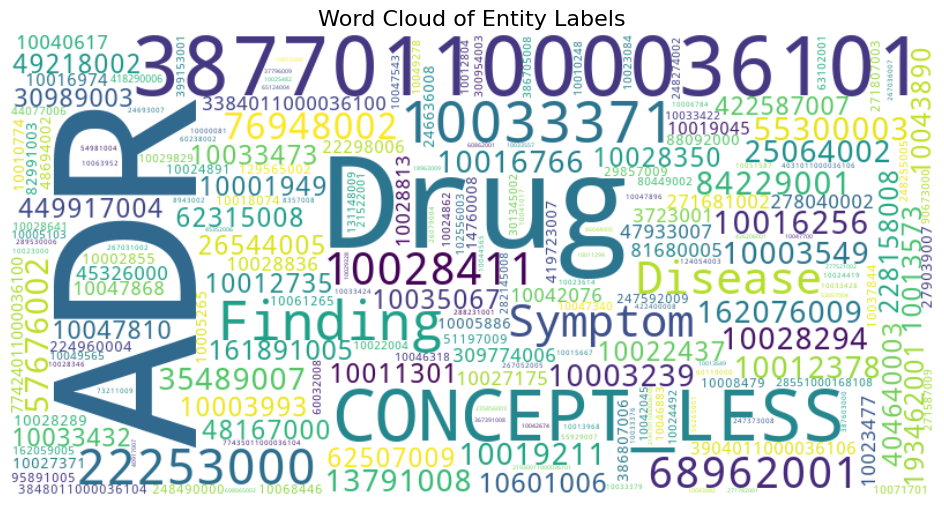

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(label_counts)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Entity Labels", fontsize=16)
plt.show()


/var/folders/w3/ck_g4w8d0_x82d60fpy0f82c0000gn/T/ipykernel_44350/3474361283.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  annotation_files["BaseFile"] = annotation_files["File"].str.replace(".ann", "", regex=False)
/var/folders/w3/ck_g4w8d0_x82d60fpy0f82c0000gn/T/ipykernel_44350/3474361283.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_files["BaseFile"] = text_files["File"].str.replace(".txt", "", regex=False)


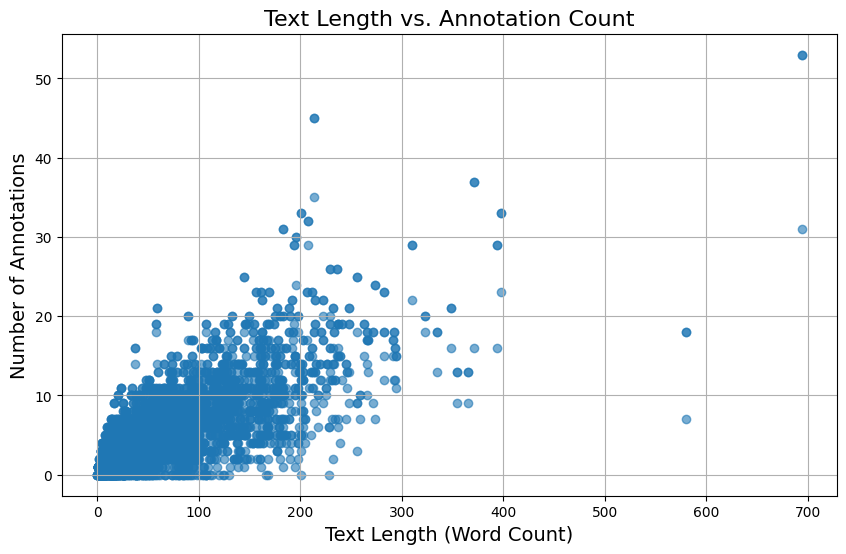

In [ ]:
annotation_files["BaseFile"] = annotation_files["File"].str.replace(".ann", "", regex=False)
text_files["BaseFile"] = text_files["File"].str.replace(".txt", "", regex=False)
merged_data = pd.merge(
    text_files[["BaseFile", "WordCount"]],
    annotation_files[["BaseFile", "AnnotationCount"]],
    on="BaseFile",
    how="inner"
)

plt.figure(figsize=(10, 6))
plt.scatter(merged_data["WordCount"], merged_data["AnnotationCount"], alpha=0.6)
plt.title("Text Length vs. Annotation Count", fontsize=16)
plt.xlabel("Text Length (Word Count)", fontsize=14)
plt.ylabel("Number of Annotations", fontsize=14)
plt.grid(True)
plt.show()


# NER

In [1]:
import os
import torch
import random
import nltk
import numpy as np
from collections import Counter
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from difflib import SequenceMatcher
from transformers import AutoTokenizer, AutoConfig, AutoModelForTokenClassification, TrainingArguments, Trainer, DataCollatorForTokenClassification, EarlyStoppingCallback
from datasets import Dataset, DatasetDict

/Users/devikarajasekar/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/devikarajasekar/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Checking for GPU availability using MPS
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print(f"Using device: {device}")

Using device: mps


In [3]:
# Allow MPS to use all available memory
os.environ["TOKENIZERS_PARALLELISM"] = "false"
os.environ["PYTORCH_MPS_HIGH_WATERMARK_RATIO"] = "0.0"

# Clear memory before training
torch.mps.empty_cache()

In [4]:
def fuzzy_match(span_text, entity_text, threshold=0.8):
    similarity = SequenceMatcher(None, span_text, entity_text).ratio()
    return similarity > threshold

def parse_ann_file(ann_file, text):
    """
    Parses a .ann file to extract entity annotations.
    Validates alignment with the text, supports multi-span entities, and skips malformed annotations.
    Returns a list of tuples: [(label, start, end, text), ...] and skipped count.
    """
    annotations = []
    skipped_annotations = 0
    problematic_files = []

    try:
        with open(ann_file, 'r', encoding='utf-8') as f:
            for line in f:
                parts = line.strip().split('\t')
                if len(parts) < 3:
                    skipped_annotations += 1
                    continue

                entity_info = parts[1]
                entity_text = parts[2]

                # Skip AnnotatorNotes
                if parts[0].startswith('#'):
                    skipped_annotations += 1
                    continue

                # Handle multi-span entities
                if ';' in entity_info:
                    span_parts = entity_info.split(' ')
                    label = span_parts[0]
                    spans = span_parts[1:]

                    try:
                        full_text = ''
                        start_indices = []
                        end_indices = []

                        for span in spans:
                            if ';' in span or ' ' in span:
                                try:
                                    start, end = map(int, span.split(';') if ';' in span else span.split())
                                    start_indices.append(start)
                                    end_indices.append(end)
                                    full_text += text[start:end] + " "
                                except ValueError:
                                    continue
                            else:
                                continue

                        if not start_indices or not end_indices:
                            problematic_files.append(ann_file)
                            continue

                        full_text = full_text.strip()
                        if not fuzzy_match(full_text, entity_text):
                            skipped_annotations += 1
                            continue

                        annotations.append((label, start_indices, end_indices, entity_text))
                    except Exception:
                        skipped_annotations += 1
                    continue

                # Handle single-span entities
                entity_parts = entity_info.split(' ')
                if len(entity_parts) != 3:
                    skipped_annotations += 1
                    continue

                label, start, end = entity_parts
                try:
                    start, end = int(start), int(end)
                    span_text = text[start:end]
                    if not fuzzy_match(span_text, entity_text):
                        skipped_annotations += 1
                        continue

                    annotations.append((label, start, end, entity_text))
                except ValueError:
                    skipped_annotations += 1
    except Exception as e:
        print(f"Error reading annotation file {ann_file}: {e}")

    return annotations, skipped_annotations


def load_and_count_data(text_folder, annotation_folder):
    """
    Loads and counts successfully parsed texts and annotations for preprocessing.
    """
    total_texts = 0
    total_annotations = 0
    skipped_annotations = 0

    try:
        # List all .txt and .ann files
        text_files = set(f.replace('.txt', '') for f in os.listdir(text_folder) if f.endswith('.txt'))
        ann_files = set(f.replace('.ann', '') for f in os.listdir(annotation_folder) if f.endswith('.ann'))
    except Exception as e:
        print(f"Error listing files in folders: {e}")
        return total_texts, total_annotations, skipped_annotations

    # Ensure matched files
    matched_files = text_files & ann_files
    print(f"Total matched files: {len(matched_files)}")

    for file in matched_files:
        try:
            txt_path = os.path.join(text_folder, f"{file}.txt")
            ann_path = os.path.join(annotation_folder, f"{file}.ann")
            
            # Read text
            with open(txt_path, 'r', encoding='utf-8') as f:
                text = f.read().strip()
                if not text:  # Skip empty texts
                    continue
                total_texts += 1

            # Read annotations
            annotations, skipped = parse_ann_file(ann_path, text)
            total_annotations += len(annotations)
            skipped_annotations += skipped
        except Exception as e:
            print(f"Error processing file {file}: {e}")

    return total_texts, total_annotations, skipped_annotations


text_folder = '/Users/devikarajasekar/Documents/Leiden/Courses/TM/Final assignment/CADEC-lPWNPfjE-/data/cadec/text'
annotation_folder = '/Users/devikarajasekar/Documents/Leiden/Courses/TM/Final assignment/CADEC-lPWNPfjE-/data/cadec/original'

texts, annotations, skipped = load_and_count_data(text_folder, annotation_folder)

print(f"Total texts loaded: {texts}")
print(f"Total annotations loaded: {annotations}")
print(f"Total skipped annotations: {skipped}")


Total matched files: 1250
Total texts loaded: 1248
Total annotations loaded: 8044
Total skipped annotations: 1642


In [5]:
# Define Label Mapping
label_to_id = {
    "O": 0, "B-ADR": 1, "I-ADR": 2,
    "B-Drug": 3, "I-Drug": 4,
    "B-Finding": 5, "I-Finding": 6,
    "B-Disease": 7, "I-Disease": 8,
    "B-Symptom": 9, "I-Symptom": 10,
    "PAD": -100,  # Special token padding
}
id_to_label = {v: k for k, v in label_to_id.items()}

In [6]:
def preprocess_text_and_annotations(text, annotations, tokenizer):
    
    # Tokenize text and get a mapping from word ids to tokens
    encoded = tokenizer(text, return_offsets_mapping=True, truncation=True, padding=True)
    tokens = tokenizer.convert_ids_to_tokens(encoded['input_ids'])
    word_ids = encoded.word_ids()

    # Initialize labels for each token to 'O' (assuming 'O' is 0)
    labels = [0] * len(tokens)

    # Adjust labels based on annotations
    for label, start, end, entity_text in annotations:
        # Convert character offsets to token indexes, handling subword tokens
        entity_tokens = tokenizer.tokenize(entity_text)
        entity_start_token = tokenizer.convert_tokens_to_ids(entity_tokens[0])
        entity_end_token = tokenizer.convert_tokens_to_ids(entity_tokens[-1])

        start_token_index = None
        end_token_index = None
        
        # Find the first and last tokens of the entity in the text
        for idx, (token, offset) in enumerate(zip(encoded['input_ids'], encoded['offset_mapping'])):
            if start_token_index is None and entity_start_token == token and start >= offset[0] and start < offset[1]:
                start_token_index = idx
            if entity_end_token == token and end <= offset[1] and end > offset[0]:
                end_token_index = idx

        if start_token_index is not None and end_token_index is not None:
            labels[start_token_index] = label_to_id['B-' + label]
            for i in range(start_token_index + 1, end_token_index + 1):
                labels[i] = label_to_id['I-' + label]

    # Set label for special tokens ([CLS], [SEP]) to -100
    aligned_labels = [-100 if word_id is None else labels[idx] for idx, word_id in enumerate(word_ids)]

    return {
        "input_ids": encoded["input_ids"],
        "attention_mask": encoded["attention_mask"],
        "labels": aligned_labels
    }

def preprocess_ner_data(text_folder, annotation_folder, tokenizer):
    import os
    preprocessed_data = []
    
    text_files = {f[:-4] for f in os.listdir(text_folder) if f.endswith('.txt')}
    ann_files = {f[:-4] for f in os.listdir(annotation_folder) if f.endswith('.ann')}
    matched_files = text_files & ann_files
    
    for file in matched_files:
        txt_path = os.path.join(text_folder, file + ".txt")
        ann_path = os.path.join(annotation_folder, file + ".ann")
        
        with open(txt_path, 'r') as f:
            text = f.read()
        annotations, _ = parse_ann_file(ann_path,text)
        
        processed_data = preprocess_text_and_annotations(text, annotations, tokenizer)
        
        preprocessed_data.append(processed_data)
    
    return preprocessed_data

# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
preprocessed_data = preprocess_ner_data(text_folder, annotation_folder, tokenizer)

In [26]:
def validate_preprocessing(text_folder, annotation_folder, tokenizer, label_to_id, num_samples=5):
    """
    Validate preprocessing logic against a sample of the dataset.
    """
    preprocessed_data = preprocess_ner_data(text_folder, annotation_folder, tokenizer)
    valid_label_ids = set(label_to_id.values())  # Numerical IDs for validation
    
    for idx, data in enumerate(preprocessed_data[:num_samples]):
        input_ids = data["input_ids"]
        labels = data["labels"]  # Numerical labels
        tokens = tokenizer.convert_ids_to_tokens(input_ids)

        print(f"Sample {idx + 1}:")
        print("Tokens: ", tokens)
        print("Labels: ", labels)

        # Check if labels match valid label IDs
        invalid_labels = [label for label in labels if label != -100 and label not in valid_label_ids]
        if invalid_labels:
            print(f"  Invalid labels: {invalid_labels}")
        else:
            print("  Labels are valid.\n")

validate_preprocessing(text_folder, annotation_folder, tokenizer, label_to_id)

Sample 1:
Tokens:  ['[CLS]', 'decrease', 'in', 'pain', '.', '[SEP]']
Labels:  [-100, 0, 0, 9, 0, -100]
  Labels are valid.

Sample 2:
Tokens:  ['[CLS]', 'i', 'have', 'been', 'on', 'lip', '##itor', 'for', 'over', 'a', 'year', 'and', 'it', 'did', 'lower', 'my', 'cho', '##les', '##terol', 'from', '299', 'to', '220', ',', 'but', 'i', ',', 'too', ',', 'have', 'been', 'having', 'side', 'effects', ',', 'i', 'guess', 'now', ',', 'that', 'might', 'be', 'attributed', 'to', 'lip', '##itor', '.', 'i', 'have', 'this', 'weird', 'dizzy', '/', 'vertigo', '/', 'un', '-', 'balanced', '-', 'type', 'feeling', 'sometimes', '.', 'it', 'is', 'a', 'feeling', 'like', 'i', 'need', 'to', 'hold', 'on', 'to', 'something', ',', 'in', 'order', 'to', 'make', 'my', 'walk', 'across', 'a', 'large', 'area', ',', 'like', 'an', 'airport', '.', '(', 'i', 'fly', 'al', '##ot', ',', 'so', 'i', 'walk', 'through', '##t', 'a', 'lot', 'of', 'airports', '.', ')', 'i', 'also', 'have', 'a', 'lot', 'of', 'problems', 'with', 'frequent'

In [7]:
# Prepare Hugging Face Dataset

def prepare_hf_dataset(preprocessed_data):
    """
    Converts preprocessed data into a Hugging Face Dataset format.
    """
    input_ids = []
    attention_masks = []
    labels = []

    for data in preprocessed_data:
        input_ids.append(data["input_ids"])
        attention_masks.append(data["attention_mask"])
        labels.append(data["labels"])

    return Dataset.from_dict({
        "input_ids": input_ids,
        "attention_mask": attention_masks,
        "labels": labels
    })


hf_dataset = prepare_hf_dataset(preprocessed_data)

# Split the dataset into train and validation sets
split_data = hf_dataset.train_test_split(test_size=0.2, seed=42)

split_data = DatasetDict({
    "train": split_data["train"],
    "validation": split_data["test"]
})


print("Train Dataset:", split_data["train"])
print("Validation Dataset:", split_data["validation"])


Train Dataset: Dataset({
    features: ['input_ids', 'attention_mask', 'labels'],
    num_rows: 1000
})
Validation Dataset: Dataset({
    features: ['input_ids', 'attention_mask', 'labels'],
    num_rows: 250
})


In [8]:
# Load the BioBERT model and tokenizer
model_name = "Devbom/biobert-cadec-ner"
model = AutoModelForTokenClassification.from_pretrained(model_name)
data_collator = DataCollatorForTokenClassification(tokenizer=tokenizer)


/Users/devikarajasekar/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [9]:
# Define training arguments
training_args = TrainingArguments(
    output_dir="./results",           # Directory to save the results
    evaluation_strategy="epoch",     # Evaluate every epoch
    learning_rate=5e-5,              # Learning rate
    per_device_train_batch_size=16,  # Batch size for training
    per_device_eval_batch_size=16,   # Batch size for evaluation
    num_train_epochs=3,              # Number of epochs
    weight_decay=0.01,               # Weight decay
    logging_dir="./logs",            # Directory to save logs
    logging_steps=10,
    save_strategy="epoch",
    load_best_model_at_end=True
)

# Initialize the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=split_data["train"],
    eval_dataset=split_data["validation"],
    tokenizer=tokenizer,
    data_collator=data_collator
)

# Train the model
trainer.train()

# Save the trained model
model.save_pretrained("./biobert_model")
tokenizer.save_pretrained("./biobert_model")

print("Model saved successfully!")


/Users/devikarajasekar/Library/Python/3.9/lib/python/site-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
/var/folders/w3/ck_g4w8d0_x82d60fpy0f82c0000gn/T/ipykernel_64233/1313401910.py:19: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
  5%|▌         | 10/189 [06:46<2:51:23, 57.45s/it]

{'loss': 0.9886, 'grad_norm': 3.949449300765991, 'learning_rate': 4.7354497354497356e-05, 'epoch': 0.16}


 11%|█         | 20/189 [08:15<18:18,  6.50s/it]  

{'loss': 0.7, 'grad_norm': 1.103299617767334, 'learning_rate': 4.470899470899471e-05, 'epoch': 0.32}


 16%|█▌        | 30/189 [08:39<08:04,  3.05s/it]

{'loss': 0.6251, 'grad_norm': 3.733341693878174, 'learning_rate': 4.2063492063492065e-05, 'epoch': 0.48}


 21%|██        | 40/189 [11:07<15:13,  6.13s/it]  

{'loss': 0.5652, 'grad_norm': 1.9812222719192505, 'learning_rate': 3.941798941798942e-05, 'epoch': 0.63}


 26%|██▋       | 50/189 [15:20<27:05, 11.69s/it]  

{'loss': 0.4656, 'grad_norm': 1.0193408727645874, 'learning_rate': 3.677248677248677e-05, 'epoch': 0.79}


 32%|███▏      | 60/189 [17:51<09:11,  4.28s/it]  

{'loss': 0.4676, 'grad_norm': 1.0619134902954102, 'learning_rate': 3.412698412698413e-05, 'epoch': 0.95}


                                                
 33%|███▎      | 63/189 [18:00<04:22,  2.09s/it]

{'eval_loss': 0.444898396730423, 'eval_runtime': 6.3706, 'eval_samples_per_second': 39.243, 'eval_steps_per_second': 2.512, 'epoch': 1.0}


 37%|███▋      | 70/189 [18:14<03:09,  1.59s/it]

{'loss': 0.4551, 'grad_norm': 1.0703532695770264, 'learning_rate': 3.148148148148148e-05, 'epoch': 1.11}


 42%|████▏     | 80/189 [19:59<05:41,  3.14s/it]

{'loss': 0.3718, 'grad_norm': 2.9523885250091553, 'learning_rate': 2.8835978835978838e-05, 'epoch': 1.27}


 48%|████▊     | 90/189 [22:59<08:08,  4.93s/it]

{'loss': 0.3976, 'grad_norm': 1.1005725860595703, 'learning_rate': 2.6190476190476192e-05, 'epoch': 1.43}


 53%|█████▎    | 100/189 [24:46<28:11, 19.01s/it]

{'loss': 0.392, 'grad_norm': 1.854255199432373, 'learning_rate': 2.3544973544973546e-05, 'epoch': 1.59}


 58%|█████▊    | 110/189 [25:19<05:16,  4.00s/it]

{'loss': 0.387, 'grad_norm': 2.1925761699676514, 'learning_rate': 2.08994708994709e-05, 'epoch': 1.75}


 63%|██████▎   | 120/189 [26:35<06:51,  5.96s/it]

{'loss': 0.393, 'grad_norm': 3.3853085041046143, 'learning_rate': 1.8253968253968254e-05, 'epoch': 1.9}


                                                 
 67%|██████▋   | 126/189 [26:53<02:18,  2.20s/it]

{'eval_loss': 0.38742658495903015, 'eval_runtime': 6.0976, 'eval_samples_per_second': 41.0, 'eval_steps_per_second': 2.624, 'epoch': 2.0}


 69%|██████▉   | 130/189 [27:02<02:30,  2.54s/it]

{'loss': 0.3283, 'grad_norm': 1.6801977157592773, 'learning_rate': 1.560846560846561e-05, 'epoch': 2.06}


 74%|███████▍  | 140/189 [27:35<02:17,  2.81s/it]

{'loss': 0.3282, 'grad_norm': 1.2218542098999023, 'learning_rate': 1.2962962962962962e-05, 'epoch': 2.22}


 79%|███████▉  | 150/189 [27:45<00:37,  1.03it/s]

{'loss': 0.3231, 'grad_norm': 1.785627007484436, 'learning_rate': 1.0317460317460318e-05, 'epoch': 2.38}


 85%|████████▍ | 160/189 [30:18<10:12, 21.11s/it]

{'loss': 0.2893, 'grad_norm': 1.882623553276062, 'learning_rate': 7.671957671957672e-06, 'epoch': 2.54}


 90%|████████▉ | 170/189 [31:03<01:08,  3.61s/it]

{'loss': 0.2954, 'grad_norm': 1.571626901626587, 'learning_rate': 5.026455026455026e-06, 'epoch': 2.7}


 95%|█████████▌| 180/189 [33:26<02:28, 16.48s/it]

{'loss': 0.3295, 'grad_norm': 2.3079748153686523, 'learning_rate': 2.3809523809523808e-06, 'epoch': 2.86}


                                                 
100%|██████████| 189/189 [35:25<00:00,  6.63s/it]

{'eval_loss': 0.3722458481788635, 'eval_runtime': 5.5881, 'eval_samples_per_second': 44.738, 'eval_steps_per_second': 2.863, 'epoch': 3.0}


100%|██████████| 189/189 [35:28<00:00, 11.26s/it]


{'train_runtime': 2128.2853, 'train_samples_per_second': 1.41, 'train_steps_per_second': 0.089, 'train_loss': 0.44328089744325666, 'epoch': 3.0}
Model saved successfully!


In [11]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report
import numpy as np
from collections import defaultdict

# Define a function to compute metrics
def compute_metrics_per_entity(pred, label_map):
    labels = pred.label_ids
    preds = np.argmax(pred.predictions, axis=2)

    # Flatten the predictions and labels while excluding special tokens
    true_labels = []
    pred_labels = []
    for label, pred in zip(labels, preds):
        true_labels.extend(label[label != -100])  # Exclude special tokens
        pred_labels.extend(pred[label != -100])   # Exclude special tokens

    # Initialize metrics
    overall_metrics = {}
    entity_metrics = defaultdict(lambda: {"precision": 0, "recall": 0, "f1": 0, "support": 0})

    # Compute overall metrics
    overall_metrics["accuracy"] = accuracy_score(true_labels, pred_labels)
    overall_metrics["precision"] = precision_score(true_labels, pred_labels, average="weighted", zero_division=0)
    overall_metrics["recall"] = recall_score(true_labels, pred_labels, average="weighted", zero_division=0)
    overall_metrics["f1"] = f1_score(true_labels, pred_labels, average="weighted", zero_division=0)

    # Compute per-entity metrics
    report = classification_report(true_labels, pred_labels, target_names=list(label_map.values()), output_dict=True)
    for entity, scores in report.items():
        if entity not in ["accuracy", "macro avg", "weighted avg"]:
            entity_metrics[entity] = {
                "precision": scores["precision"],
                "recall": scores["recall"],
                "f1": scores["f1-score"],
                "support": scores["support"]
            }

    return overall_metrics, entity_metrics

# Define label map for entity types
label_map = {idx: label for label, idx in label_to_id.items() if label != "PAD"}

# Evaluate the model
predictions = trainer.predict(split_data["validation"])
overall_metrics, entity_metrics = compute_metrics_per_entity(predictions, label_map)

# Print overall metrics
print("Overall Evaluation Results:")
print(f"Accuracy: {overall_metrics['accuracy']:.4f}")
print(f"Precision: {overall_metrics['precision']:.4f}")
print(f"Recall: {overall_metrics['recall']:.4f}")
print(f"F1-score: {overall_metrics['f1']:.4f}")

# Print per-entity metrics
print("\nPer-Entity Metrics:")
for entity, metrics in entity_metrics.items():
    print(f"{entity}: Precision={metrics['precision']:.4f}, Recall={metrics['recall']:.4f}, F1-score={metrics['f1']:.4f}, Support={metrics['support']}")


100%|██████████| 16/16 [00:05<00:00,  2.83it/s]


Overall Evaluation Results:
Accuracy: 0.8892
Precision: 0.8723
Recall: 0.8892
F1-score: 0.8804

Per-Entity Metrics:
O: Precision=0.9310, Recall=0.9539, F1-score=0.9423, Support=21951.0
B-ADR: Precision=0.6359, Recall=0.6942, F1-score=0.6638, Support=1112.0
I-ADR: Precision=0.6439, Recall=0.6116, F1-score=0.6273, Support=2389.0
B-Drug: Precision=0.8548, Recall=0.8154, F1-score=0.8346, Support=325.0
I-Drug: Precision=0.7768, Recall=0.7403, F1-score=0.7581, Support=489.0
B-Finding: Precision=0.0000, Recall=0.0000, F1-score=0.0000, Support=60.0
I-Finding: Precision=0.0000, Recall=0.0000, F1-score=0.0000, Support=106.0
B-Disease: Precision=0.0000, Recall=0.0000, F1-score=0.0000, Support=64.0
I-Disease: Precision=0.0833, Recall=0.0093, F1-score=0.0168, Support=107.0
B-Symptom: Precision=0.0000, Recall=0.0000, F1-score=0.0000, Support=49.0
I-Symptom: Precision=0.0000, Recall=0.0000, F1-score=0.0000, Support=113.0


/Users/devikarajasekar/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/devikarajasekar/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/devikarajasekar/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

### with focal loss

In [ ]:
import torch
import torch.nn.functional as F

In [12]:
class FocalLoss(torch.nn.Module):
    def __init__(self, gamma=2.0, alpha=None, reduction="mean"):
        """
        Focal Loss for addressing class imbalance.
        
        Args:
            gamma: Focusing parameter for modulating the loss.
            alpha: Class weights (can be a list or tensor).
            reduction: Reduction method - 'none', 'mean', or 'sum'.
        """
        super(FocalLoss, self).__init__()
        self.gamma = gamma
        self.alpha = alpha
        self.reduction = reduction

    def forward(self, logits, targets):
        # Convert logits to probabilities
        probs = F.softmax(logits, dim=-1)
        targets_one_hot = F.one_hot(targets, num_classes=logits.size(-1)).float()

        # Compute the focal loss
        pt = (probs * targets_one_hot).sum(dim=-1)  # Probability of true class
        log_pt = torch.log(pt + 1e-12)
        loss = -((1 - pt) ** self.gamma) * log_pt

        # Apply class weights if given
        if self.alpha is not None:
            at = self.alpha[targets]
            loss = loss * at

        # Reduction
        if self.reduction == "mean":
            return loss.mean()
        elif self.reduction == "sum":
            return loss.sum()
        else:
            return loss


In [17]:
class CustomTrainer(Trainer):
    def __init__(self, *args, focal_loss_gamma=2.0, **kwargs):
        super().__init__(*args, **kwargs)
        self.focal_loss = FocalLoss(gamma=focal_loss_gamma)

    def compute_loss(self, model, inputs, return_outputs=False, **kwargs):
        """
        Compute Focal Loss instead of the default loss.
        """
        labels = inputs.pop("labels")
        outputs = model(**inputs)
        logits = outputs.logits

        # Apply Focal Loss
        loss = self.focal_loss(logits, labels)

        return (loss, outputs) if return_outputs else loss

In [18]:
# Initialize the custom Trainer with Focal Loss
trainer = CustomTrainer(
    model=model,
    args=training_args,
    train_dataset=split_data["train"],
    eval_dataset=split_data["validation"],
    tokenizer=tokenizer,
    data_collator=data_collator,
    focal_loss_gamma=2.0  # Adjust gamma as needed
)

# Train the model
trainer.train()

# Save the trained model
model.save_pretrained("./biobert_model_focal_loss")
tokenizer.save_pretrained("./biobert_model_focal_loss")

print("Model trained with Focal Loss and saved successfully!")


/var/folders/w3/ck_g4w8d0_x82d60fpy0f82c0000gn/T/ipykernel_64233/181845788.py:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `CustomTrainer.__init__`. Use `processing_class` instead.
  super().__init__(*args, **kwargs)
  5%|▌         | 10/189 [00:29<08:03,  2.70s/it]

{'loss': 17.2661, 'grad_norm': 1.562073826789856, 'learning_rate': 4.7354497354497356e-05, 'epoch': 0.16}


 11%|█         | 20/189 [00:50<04:22,  1.56s/it]

{'loss': 16.9683, 'grad_norm': 0.36217638850212097, 'learning_rate': 4.470899470899471e-05, 'epoch': 0.32}


 16%|█▌        | 30/189 [01:01<03:05,  1.17s/it]

{'loss': 16.528, 'grad_norm': 0.39478880167007446, 'learning_rate': 4.2063492063492065e-05, 'epoch': 0.48}


 21%|██        | 40/189 [01:32<04:31,  1.82s/it]

{'loss': 16.679, 'grad_norm': 0.28396978974342346, 'learning_rate': 3.941798941798942e-05, 'epoch': 0.63}


 26%|██▋       | 50/189 [03:15<11:24,  4.92s/it]

{'loss': 18.1254, 'grad_norm': 0.2746122181415558, 'learning_rate': 3.677248677248677e-05, 'epoch': 0.79}


 32%|███▏      | 60/189 [04:27<04:52,  2.27s/it]

{'loss': 17.1315, 'grad_norm': 0.2209376096725464, 'learning_rate': 3.412698412698413e-05, 'epoch': 0.95}


 33%|███▎      | 63/189 [04:29<02:45,  1.31s/it]
















                                                

 33%|███▎      | 63/189 [04:36<02:45,  1.31s/it]



{'eval_loss': 17.983051300048828, 'eval_runtime': 6.4722, 'eval_samples_per_second': 38.627, 'eval_steps_per_second': 2.472, 'epoch': 1.0}


 37%|███▋      | 70/189 [04:46<02:41,  1.35s/it]

{'loss': 16.16, 'grad_norm': 0.27333229780197144, 'learning_rate': 3.148148148148148e-05, 'epoch': 1.11}


 42%|████▏     | 80/189 [05:24<03:22,  1.86s/it]

{'loss': 17.6262, 'grad_norm': 0.3297826945781708, 'learning_rate': 2.8835978835978838e-05, 'epoch': 1.27}


 48%|████▊     | 90/189 [06:39<04:19,  2.63s/it]

{'loss': 17.5833, 'grad_norm': 0.30447494983673096, 'learning_rate': 2.6190476190476192e-05, 'epoch': 1.43}


 53%|█████▎    | 100/189 [07:31<11:41,  7.88s/it]

{'loss': 17.6043, 'grad_norm': 0.3710767328739166, 'learning_rate': 2.3544973544973546e-05, 'epoch': 1.59}


 58%|█████▊    | 110/189 [07:47<02:32,  1.93s/it]

{'loss': 16.9934, 'grad_norm': 0.2948080599308014, 'learning_rate': 2.08994708994709e-05, 'epoch': 1.75}


 63%|██████▎   | 120/189 [08:45<05:48,  5.05s/it]

{'loss': 17.5709, 'grad_norm': 0.6493257880210876, 'learning_rate': 1.8253968253968254e-05, 'epoch': 1.9}


 67%|██████▋   | 126/189 [08:53<01:36,  1.53s/it]
















                                                 

 67%|██████▋   | 126/189 [08:58<01:36,  1.53s/it]



{'eval_loss': 17.983861923217773, 'eval_runtime': 5.4976, 'eval_samples_per_second': 45.475, 'eval_steps_per_second': 2.91, 'epoch': 2.0}


 69%|██████▉   | 130/189 [09:06<02:00,  2.05s/it]

{'loss': 16.3089, 'grad_norm': 0.30736109614372253, 'learning_rate': 1.560846560846561e-05, 'epoch': 2.06}


 74%|███████▍  | 140/189 [09:22<01:04,  1.33s/it]

{'loss': 17.7216, 'grad_norm': 0.3275981843471527, 'learning_rate': 1.2962962962962962e-05, 'epoch': 2.22}


 79%|███████▉  | 150/189 [09:31<00:33,  1.15it/s]

{'loss': 16.6618, 'grad_norm': 0.46719107031822205, 'learning_rate': 1.0317460317460318e-05, 'epoch': 2.38}


 85%|████████▍ | 160/189 [10:03<01:55,  3.97s/it]

{'loss': 16.9537, 'grad_norm': 0.3943418562412262, 'learning_rate': 7.671957671957672e-06, 'epoch': 2.54}


 90%|████████▉ | 170/189 [10:24<00:31,  1.66s/it]

{'loss': 16.8426, 'grad_norm': 0.3631141781806946, 'learning_rate': 5.026455026455026e-06, 'epoch': 2.7}


 95%|█████████▌| 180/189 [11:22<01:22,  9.14s/it]

{'loss': 16.9516, 'grad_norm': 0.33116671442985535, 'learning_rate': 2.3809523809523808e-06, 'epoch': 2.86}


100%|██████████| 189/189 [12:10<00:00,  3.02s/it]
















                                                 

100%|██████████| 189/189 [12:17<00:00,  3.02s/it]



{'eval_loss': 17.9831485748291, 'eval_runtime': 5.581, 'eval_samples_per_second': 44.795, 'eval_steps_per_second': 2.867, 'epoch': 3.0}



100%|██████████| 189/189 [12:20<00:00,  3.92s/it]


{'train_runtime': 740.1493, 'train_samples_per_second': 4.053, 'train_steps_per_second': 0.255, 'train_loss': 17.092336584020543, 'epoch': 3.0}
Model trained with Focal Loss and saved successfully!


In [19]:
# SAME AS THE PREVIOUS

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report
import numpy as np
from collections import defaultdict

# Define a function to compute metrics
def compute_metrics_per_entity(pred, label_map):
    labels = pred.label_ids
    preds = np.argmax(pred.predictions, axis=2)

    # Flatten the predictions and labels while excluding special tokens
    true_labels = []
    pred_labels = []
    for label, pred in zip(labels, preds):
        true_labels.extend(label[label != -100])  # Exclude special tokens
        pred_labels.extend(pred[label != -100])   # Exclude special tokens

    # Initialize metrics
    overall_metrics = {}
    entity_metrics = defaultdict(lambda: {"precision": 0, "recall": 0, "f1": 0, "support": 0})

    # Compute overall metrics
    overall_metrics["accuracy"] = accuracy_score(true_labels, pred_labels)
    overall_metrics["precision"] = precision_score(true_labels, pred_labels, average="weighted", zero_division=0)
    overall_metrics["recall"] = recall_score(true_labels, pred_labels, average="weighted", zero_division=0)
    overall_metrics["f1"] = f1_score(true_labels, pred_labels, average="weighted", zero_division=0)

    # Compute per-entity metrics
    report = classification_report(true_labels, pred_labels, target_names=list(label_map.values()), output_dict=True)
    for entity, scores in report.items():
        if entity not in ["accuracy", "macro avg", "weighted avg"]:
            entity_metrics[entity] = {
                "precision": scores["precision"],
                "recall": scores["recall"],
                "f1": scores["f1-score"],
                "support": scores["support"]
            }

    return overall_metrics, entity_metrics

# Define label map for entity types
label_map = {idx: label for label, idx in label_to_id.items() if label != "PAD"}

# Evaluate the model
predictions = trainer.predict(split_data["validation"])
overall_metrics, entity_metrics = compute_metrics_per_entity(predictions, label_map)

# Print overall metrics
print("Overall Evaluation Results:")
print(f"Accuracy: {overall_metrics['accuracy']:.4f}")
print(f"Precision: {overall_metrics['precision']:.4f}")
print(f"Recall: {overall_metrics['recall']:.4f}")
print(f"F1-score: {overall_metrics['f1']:.4f}")

# Print per-entity metrics
print("\nPer-Entity Metrics:")
for entity, metrics in entity_metrics.items():
    print(f"{entity}: Precision={metrics['precision']:.4f}, Recall={metrics['recall']:.4f}, F1-score={metrics['f1']:.4f}, Support={metrics['support']}")


100%|██████████| 16/16 [00:05<00:00,  2.91it/s]

Overall Evaluation Results:
Accuracy: 0.8915
Precision: 0.8757
Recall: 0.8915
F1-score: 0.8820

Per-Entity Metrics:
O: Precision=0.9241, Recall=0.9636, F1-score=0.9434, Support=21951.0
B-ADR: Precision=0.7075, Recall=0.6439, F1-score=0.6742, Support=1112.0
I-ADR: Precision=0.7021, Recall=0.5416, F1-score=0.6115, Support=2389.0
B-Drug: Precision=0.8234, Recall=0.8462, F1-score=0.8346, Support=325.0
I-Drug: Precision=0.7346, Recall=0.8037, F1-score=0.7676, Support=489.0
B-Finding: Precision=0.3030, Recall=0.1667, F1-score=0.2151, Support=60.0
I-Finding: Precision=0.0392, Recall=0.0189, F1-score=0.0255, Support=106.0
B-Disease: Precision=0.0000, Recall=0.0000, F1-score=0.0000, Support=64.0
I-Disease: Precision=0.3023, Recall=0.1215, F1-score=0.1733, Support=107.0
B-Symptom: Precision=0.1818, Recall=0.0816, F1-score=0.1127, Support=49.0
I-Symptom: Precision=0.0000, Recall=0.0000, F1-score=0.0000, Support=113.0



/Users/devikarajasekar/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/devikarajasekar/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/devikarajasekar/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric